<a href="https://colab.research.google.com/github/AparnaR06/Data-Exploration-and-Visualization/blob/main/Ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file created successfully.


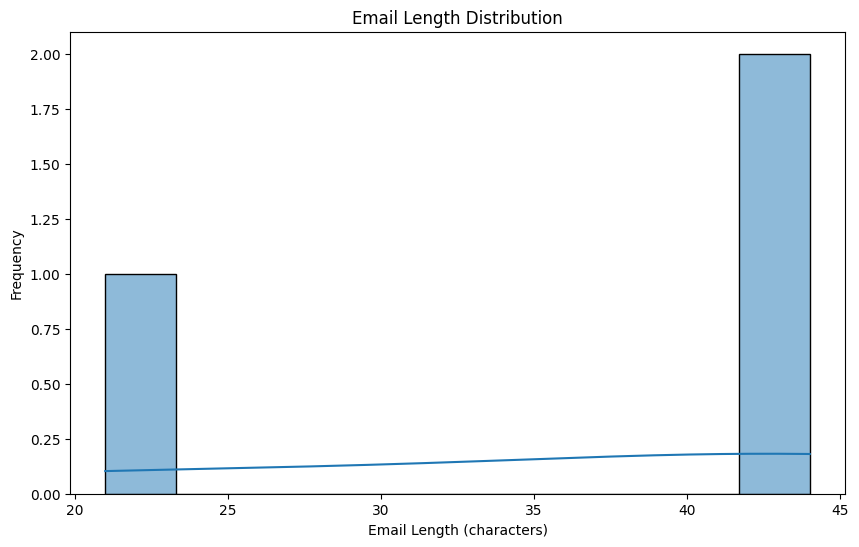

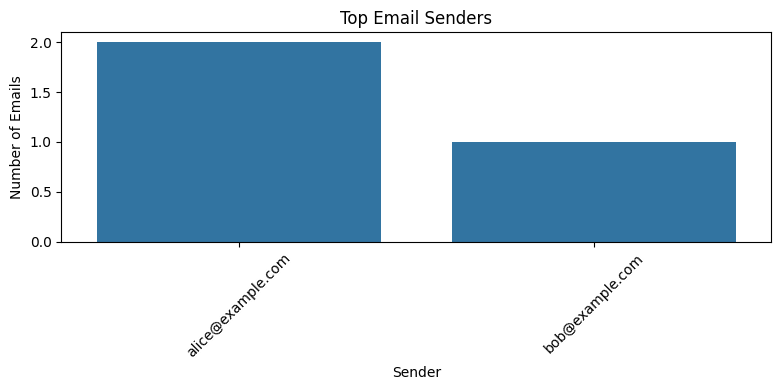

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


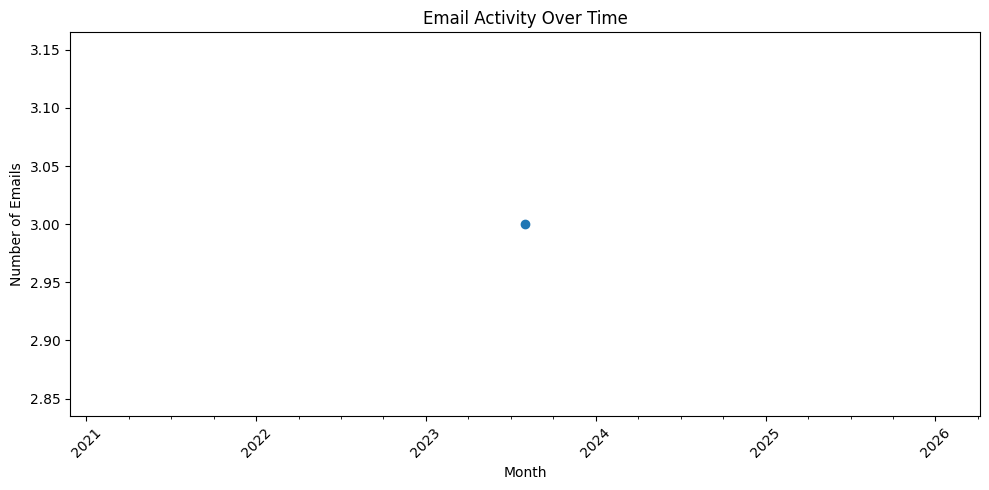

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define sample email dataset
data = {
    'sender': ['alice@example.com', 'bob@example.com', 'alice@example.com'],
    'receiver': ['bob@example.com', 'alice@example.com', 'carol@example.com'],
    'subject': ['Hello', 'Meeting Reminder', 'Project Update'],
    'timestamp': ['2023-08-01 10:00:00', '2023-08-02 14:30:00', '2023-08-03 09:15:00'],
    'content': [
        'Hi Bob,\n\nHow are you?',
        "Hi Alice,\n\nDon't forget the meeting at 3 PM.",
        "Hi Carol,\n\nHere's the latest project update."
    ]
}

# Step 3: Create DataFrame
df = pd.DataFrame(data)

# Step 4: Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 5: Save to CSV
df.to_csv('emails.csv', index=False)
print("CSV file created successfully.")

# Step 6: Load CSV into DataFrame
df = pd.read_csv('emails.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 7: Clean and add new columns
df.dropna(inplace=True)
df['email_length'] = df['content'].apply(len)
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Step 8: Plot email length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='email_length', bins=10, kde=True)
plt.title("Email Length Distribution")
plt.xlabel("Email Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Step 9: Top senders
top_senders = df['sender'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=top_senders.index, y=top_senders.values)
plt.title("Top Email Senders")
plt.xlabel("Sender")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 10: Email activity over time
df['year_month'] = df['timestamp'].dt.to_period('M')
monthly_activity = df.groupby('year_month').size()

plt.figure(figsize=(10, 5))
monthly_activity.plot(marker='o')
plt.title("Email Activity Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
